<a href="https://colab.research.google.com/github/reisdout/FederatedColab/blob/main/federated_network_5ACK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

04 MAIO 23:

Em busca de avaliar como os modelos se comportam em clientes diferentes. Para isso será modoficada a classe Federated para que tenha um método que retorne os modelos de outros clientes para cada um dos clientes registrados.

In [1]:
from google.colab import drive    
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import time
import random
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import ion
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import RegressorMixin
from tensorflow.python import training
#%matplotlib inline
#%matplotlib notebook
import os 
import gc

https://ai-pool.com/d/how-to-get-the-weights-of-keras-model-

Keras has implemented some functions for getting or setting weights for every layer. 

    layer.get_weights(): returns the weights of the layer as a list of Numpy arrays.
    layer.set_weights(weights): sets the weights of the layer from a list of Numpy arrays.

Using these functions you can write a piece of code to get all layers' weights

for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays

Or you can get the weights right from the model

from keras.models import Sequential

model = Sequential()
# ...
weights = model.get_weights() # returs a numpy list of weights

Keras model also has get_weights() and set_weights(weights) functions like every layer has.

If you need more take a look at this keras doc.






https://stackoverflow.com/questions/47183159/how-to-set-weights-in-keras-with-a-numpy-array

The set_weights() method of keras accepts a list of numpy arrays, what you have passed to the method seems like a single array. The shape of this should be the same as the shape of the output of get_weights() on the same layer. Here's the code:
```
l=[]
x=np.array() #weights
y=np.array() #array of biases
l.append(x)
l.append(y)
```

loaded_model.layers[0].set_weights(l) #loaded_model.layer[0] being the layer


In [ ]:
server_types = ["AMA","INTERCHANGE"]

In [28]:
'''
  
class Server_FederatedOMS:
  
  In the central server, we decide to use only the highest
  accuracy holder model as the central server updated model, send it to the local
  clients after the computation.



  def ReceiveModelsFromClients(self, parIdCliente):
    print("Recebido Modelo do Cliente 1")
  def Consolidar(self):
    print("Consolidado todos os modelos")
  def FeedBackConsolidatedModel(self):
    print ("Modelos enviados")

  clients = ['Cliente1', 'Cliente2']


class Server_FederatedBMA():

owever, in the BMA technique, the central server receives
four models with model accuracy performances from the local servers or clients.
In the central server, we sort the model using their performances. Then we
decide to use the two best models or half of the models based on performances.
Then BMA technique loops through each model’s hidden layers and neurons to do
the sum of the weights and average them accordingly.

  def ReceiveModelsFromClients(self)
  def Consolidar(self)
  def FeedBackConsolidatedModel(self)

    clients[] = ['Cliente1', 'Cliente2']



    def __init__(self, parCentralServer, parId):
      self.id=parId
      self.centralServer = parCentralServer
      #self.centralServer.RegisterClient(self,self)


'''

class LoggingCallback(keras.callbacks.Callback):
    """Callback that logs message at end of epoch.
    """


    def __init__(self, parExpDir):
       
        self.exp_dir = parExpDir


    def on_epoch_end(self, epoch, logs=None):

        print ("Chegei ao fim da época")
        file_path = self.exp_dir+"/readme.txt"

        f = open(file_path, "a")
        msg = "{Epoch: %i} %s" % (epoch, ", ".join("%s: %f" % (k, v) for k, v in logs.items()))
        f.write(msg+"\n")
        f.close()



class Client():



    #resultadoTreinamento = np.eye(10)

    def __init__(self,
                 parId,
                 parTraininPath, 
                 parTestPath, 
                 parEpoch,
                 parUnits, 
                 parBatchSize, 
                 parPrevisionWindow, 
                 parStepsOut,
                 parCongestionProtocol,
                 parNumWebNodes, 
                 parRTTToRouter,
                 parExpTime,
                 parExpDir,
                 par_exp_dir_out_from_fit,
                 par_exp_dir_out_from_file):
 
      self.id = parId
      self.id_in_server=-1 #-1 indica que não foi cadastrado no servidor
      self.trainingPath=parTraininPath
      self.testPath = parTestPath
      self.T = parPrevisionWindow
      #centralServer = Server_FederatedAMA()
      #confusionMatrizModelClient = np.full((2,2), 1)
      #confusionMatrizModelServer = np.full((2,2), 2)
      self.currentConfusionMatriz =np.full((2,2), 0) # Apesar de ser obtidas a partir de listas, a matriz de comfusão é numpy
      self.weightsClientModel = []
      self.weightsServerModel = []
      #self.total_ConsolidateModels=0;
      #self.base = pd.DataFrame()
      #self.base_treinamento =  np.array([])
      self.real_congestion_test = np.array([])
      self.latest_prevision = np.array([])
      #self.test_vectors = []
      #self.previsores = []
      #self.real_congestion = []
      #self.regressor = Sequential()
      self.input_shape =0;
      self.base_teste=[]
      self.len_base_teste = 0;
      self.n_steps_out = parStepsOut
      self.congestion_protocol = parCongestionProtocol
      self.mean_real_congestion = 0;
      self.mean_predicted_congestion=0;
      #self.windowMemory = parWindowMemory #substituido pela unit
      self.exp_units=parUnits
      self.exp_batch_size=parBatchSize
      self.exp_num_web_nodes=parNumWebNodes;
      self.exp_RTT_to_router=parRTTToRouter;
      self.exp_epoch=parEpoch
      self.exp_time=parExpTime
      self.exp_dir = parExpDir
      self.num_plot = 0;
      self.last_server_type_sender = "AMA" #AMA, INTERCHANGE
      self.total_model_received_form_server=0
      self.model_saves = 0
      self.exp_dir_out_from_fit = par_exp_dir_out_from_fit
      self.exp_dir_out_from_file =par_exp_dir_out_from_file



 
 
      #self.centralServer.RegisterClient(self,self)

    def NormalizeFeatures(self, data):

       data['ack_ewma(ms)'] = data['ack_ewma(ms)'].div(data['ack_ewma(ms)'].max())
       data['send_ewma(ms)'] = data['send_ewma(ms)'].div(data['send_ewma(ms)'].max())
       data['rtt_ratio'] = data['rtt_ratio'].div(data['rtt_ratio'].max())
       data['cwnd (Bytes)'] = data['cwnd (Bytes)'].div(data['cwnd (Bytes)'].max())
       return data

    def SplitBase(self, base):
      training_base = base.iloc[0:base.shape[0]-200,:]
      teste = base.iloc[base.shape[0]-200:base.shape[0],:]
      return training_base, teste


    
    def RefreshFromServerModel(self):
      if(self.ServerModelIsBetter()):
          print("Pesos atualizados de acordo com o modelo do servidor")
          return True
      else:
          print("Pesos Mantidos de acordo com o modelo do cliente")
          return False

    def LoadTrainingDataSet(self):
      base = pd.read_csv(self.trainingPath)
      base = base.dropna()
      base = self.NormalizeFeatures(base)
      base_treinamento, self.base_teste = self.SplitBase(base)
      base_treinamento = base.iloc[:, [1,2,3,4,5]].values
      #base_treinamento = base.iloc[:, [1,2,3,5]].values
      #print("Veja a base de treinamento normalizada")
      #print(base_treinamento)
      #input();
      #normalizador = MinMaxScaler(feature_range=(0,1))
      #base_treinamento = normalizador.fit_transform(base_treinamento)
      #base_treinamento = base.iloc[:, [2,4,6]].values
      previsores=[]
      real_congestion = []

      #real_congestion_ahead = []

      #base_treinamento.shape[0] número de linhas dos dados de treinamento
      #"-self.n_steps_out", pois, se não estoura, não dá para fazer 5 a frente a partir do último                                                                   
      for i in range(self.T, base_treinamento.shape[0]):
        end_ix = i+self.n_steps_out
        if end_ix > base_treinamento.shape[0]:
          break;
        #previsores.append(base_treinamento[i-self.T:i, 0:4])#o que é considerado é o limite superior do rante -1
        previsores.append(base_treinamento[i-self.T:i, 0:4])#o que é considerado é o limite superior do rante -1 e sem a informação do percentual de ocupação do buffer
        real_congestion.append(base_treinamento[(i-1)+self.n_steps_out,4])#
    
        '''
        #Se quiser repetir os últimos valores
        real_congestion_ahead.clear();
        
        for k in range (self.n_steps_out):
          if i+k < base_treinamento.shape[0]:
            #print(i+k,"---> ", base_treinamento[i+k, 3])
            real_congestion_ahead.append(base_treinamento[i+k, 4])#O resultado é do último cara
          else:
            real_congestion_ahead.append(base_treinamento[base_treinamento.shape[0]-1, 4])#O resultado é do último cara
        real_congestion.append(real_congestion_ahead.copy())
        '''
        #print(real_congestion)
        #input("real_congestion ++")
      '''
      *********************************SOBRE O RESHAPE**************************************
      Veja que nesse caso não é necessário fazer o reshape, uma vez que o array previsores , já sai
      no formato [samples, timesteps, features]
      *sample: Ajanela deslizante em T vai gerar um número de inserções em previsores, correspondente ao número de samples
      *timesteps:inserções de exatamente T arrays, que nesse caso é equivalente ao timestamps, ou seja, quantas leituras no tempo estamos 
      considerando para prever. 
      *features: T arrays de n features

      no nosso caso:

      seja

      base_treinamento = np.array([
                          [0.0618679825944638,1.48529333300134E-05,0.849658635009267,	1,	0.8],
                          [0.0618642722717276,1.29963255564132E-05,0.856697088426436,0.960369635326222,0.8],
                          [0.061861180336114,	1.13717804155358E-05,0.863735541843606,0.915095509799057,	0.78],
                          [0.0618582945295414,9.95030786359384E-06,0.870773995260775,0.892458447035475,	0.76],
                          [0.0620104177617272,8.70651048799314E-06,0.877953217746287,0.869821384271893,	0.74],
                          [0.06214357712215,  7.6182100159712E-06, 0.8851324402318,0.860208385016125,	0.72],
                          [0.0622600400302597	,6.66593154081194E-06	,0.892311662717312,0.847184321508311,	0.7],
                          [0.0623620739055063	,5.83269009821044E-06	,0.899490885202825,	0.847184321508311,	0.68],
                          [0.0624511216511761	,5.1035993896084E-06,0.906670107688337,0.847184321508311,	0.69],
                          [0.062529244557678	,4.46565835855882E-06	,0.91384933017385	,0.847184321508311,	0.78],
                          [0.0625974732702166,3.9074488405761E-06	,0.921028552659362	,0.847184321508311,	0.58],
                          [0.0626572506920783	,3.41901106601549E-06	,0.928207775144875,0.847184321508311,	0.48],
                          [0.0627096074684674	,2.99163023643782E-06	,0.935386997630387,0.847184321508311,	0.38],
                          [0.0627553681155477	,2.61767645688309E-06	,0.9425662201159,0.0226370627635822,	0.18],
                          [0.0627953571494827	,2.29048023874991E-06	,0.949745442601412,0.0226370627635822,	0.28],


      ])


      ou seja 15 samples, 4 features e uma a ser prevista. Vamos considerar T=3 e n_steps_out=4(n_steps_out=0 já é um a frente, ou seja tem que bater em T)  
      Daí só vai sobrar 15-(T+n_steps_out-1= 3+4-1) = 9 samples
      a saída será

      previsores
             1               2              3             4
    1  [[6.18679826e-02 1.48529333e-05 8.49658635e-01 1.00000000e+00]
      T [6.18642723e-02 1.29963256e-05 8.56697088e-01 9.60369635e-01]
        [6.18611803e-02 1.13717804e-05 8.63735542e-01 9.15095510e-01]] 0.7
    2  [[6.18642723e-02 1.29963256e-05 8.56697088e-01 9.60369635e-01]
      T [6.18611803e-02 1.13717804e-05 8.63735542e-01 9.15095510e-01]
        [6.18582945e-02 9.95030786e-06 8.70773995e-01 8.92458447e-01]] 0.68
    3[  [6.18611803e-02 1.13717804e-05 8.63735542e-01 9.15095510e-01]
      T [6.18582945e-02 9.95030786e-06 8.70773995e-01 8.92458447e-01]
        [6.20104178e-02 8.70651049e-06 8.77953218e-01 8.69821384e-01]] 0.69
    4[  [6.18582945e-02 9.95030786e-06 8.70773995e-01 8.92458447e-01]
      T [6.20104178e-02 8.70651049e-06 8.77953218e-01 8.69821384e-01]
        [6.21435771e-02 7.61821002e-06 8.85132440e-01 8.60208385e-01]] 0.78
    5[  [6.20104178e-02 8.70651049e-06 8.77953218e-01 8.69821384e-01]
      T [6.21435771e-02 7.61821002e-06 8.85132440e-01 8.60208385e-01]
        [6.22600400e-02 6.66593154e-06 8.92311663e-01 8.47184322e-01]] 0.58
    6[  [6.21435771e-02 7.61821002e-06 8.85132440e-01 8.60208385e-01]
      T [6.22600400e-02 6.66593154e-06 8.92311663e-01 8.47184322e-01]
        [6.23620739e-02 5.83269010e-06 8.99490885e-01 8.47184322e-01]] 0.48
    7[  [6.22600400e-02 6.66593154e-06 8.92311663e-01 8.47184322e-01]
      T [6.23620739e-02 5.83269010e-06 8.99490885e-01 8.47184322e-01]
        [6.24511217e-02 5.10359939e-06 9.06670108e-01 8.47184322e-01]] 0.38
    8[  [6.23620739e-02 5.83269010e-06 8.99490885e-01 8.47184322e-01]
      T [6.24511217e-02 5.10359939e-06 9.06670108e-01 8.47184322e-01]
        [6.25292446e-02 4.46565836e-06 9.13849330e-01 8.47184322e-01]] 0.18
    9[  [6.24511217e-02 5.10359939e-06 9.06670108e-01 8.47184322e-01]
      T [6.25292446e-02 4.46565836e-06 9.13849330e-01 8.47184322e-01]
        [6.25974733e-02 3.90744884e-06 9.21028553e-01 8.47184322e-01]] 0.28

          ou seja
          [samples,timestepes,features]

      '''
      previsores, real_congestion = np.array(previsores), np.array(real_congestion)
      '''
      print("shape previsores: ")
      print(previsores.shape)
      #input("shape dos previsores")
      print("Amostra Previsores")      
      print(previsores[0])
      print(previsores[1])
      print(previsores[2])
      #input("Amostra Previsores Exibidos acima")
      print("Real Congestion: ")
      print(real_congestion)
      #input("exibidos os Congestionamentos Reais")
      '''
      self.input_shape = previsores.shape[1]
      return previsores, real_congestion
      
    def GetModel(self):
      regressor = Sequential()
      #regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (self.input_shape, 4)))# 4, pois são 4 previsores
      #regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (self.input_shape, 4)))# 3, retirando o valor do preenchimento do buffer.
      #regressor.add(Bidirectional(LSTM(units = 100, return_sequences = True, input_shape = (self.input_shape, 4))))
      #regressor.add(Dropout(0.3)) #zerar 30% das entradas para evitar o overfiting

      #regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (self.input_shape, 4)))
      #regressor.add(LSTM(units = 20, return_sequences = True, input_shape = (self.input_shape, 4)))
      #regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (self.input_shape, 4)))
      #regressor.add(LSTM(units = 6, return_sequences = True, input_shape = (self.input_shape, 4)))
      regressor.add(LSTM(units = 2*self.exp_units, return_sequences = True, input_shape = (self.input_shape, 4)))
      regressor.add(Dropout(0.3)) #zerar 30% das entradas para evitar o overfiting
      
      
      #regressor.add(LSTM(units = 50, return_sequences = True))
      #regressor.add(LSTM(units = 10, return_sequences = True))
      #regressor.add(LSTM(units = 6, return_sequences = True))
      regressor.add(LSTM(units = self.exp_units, return_sequences = True))
      regressor.add(Dropout(0.3))


      #regressor.add(LSTM(units = 50, return_sequences = True))
      #regressor.add(LSTM(units = 10, return_sequences = True))
      #regressor.add(LSTM(units = 6, return_sequences = True))
      regressor.add(LSTM(units = self.exp_units, return_sequences = True))
      regressor.add(Dropout(0.3))

      #regressor.add(LSTM(units = 50))
      #regressor.add(LSTM(units = 10))
      #regressor.add(LSTM(units = 6))
      regressor.add(LSTM(units = self.exp_units))
      regressor.add(Dropout(0.3))

      '''
      Segundo https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
      as saídas de cada unidade da LSTM e, portanto, a saída global é a dimenção do número de previsores, que, no nosso
      caso, é 4. Daí esses 4 estão sendo levados em um softmax de tres neurônios, pois há tres categorias no final"
      ''' 
      #regressor.add(Dense(units = 1, activation = 'sigmoid', name="client_"+str(self.id))) #para uma previsão
      regressor.add(Dense(units = self.n_steps_out, activation = 'sigmoid', name="client_"+str(self.id)))
      
      #regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['mean_absolute_error'])

      return regressor

    def GetModelFromFile(self, parSave):

      arquivo = open(self.exp_dir+"/model_"+str(parSave)+".json",'r')
      estrutura_regressor = arquivo.read()
      arquivo.close()
      regressor = model_from_json(estrutura_regressor)
      regressor.load_weights(self.exp_dir+"/model_weights_"+str(parSave)+".h5")
      #Atualiza a lista de pesos, só para manter a coerencia, pois os pesos já estão no regressor
      #mas devem também ser os pesos atuais do cliente, pelo qual está pervendo
      self.weightsClientModel.clear()
      for e in regressor.get_weights():
        self.weightsClientModel.append(e)
      return regressor


    def RefreshModel(self, parInitial=False): #Constroi na primeira vez e atualiza, a partir da avaliação do servidor cetral
      #pensar melhor no critério
      previsores,real_congestion = self.LoadTrainingDataSet()

      #regressor = Sequential()
      regressor = self.GetModel();
      #indica que já foi feito um treinamento ou consolidação de modelos prévia
      if(len (self.weightsClientModel)):
        regressor.set_weights(self.weightsClientModel)      

      opt = keras.optimizers.Adam(learning_rate=0.0001)
      regressor.compile(optimizer = opt, loss = 'mean_squared_error',metrics = ['mean_absolute_error'])
      #es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10, verbose = 1)
      #rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 5, verbose = 1)
      #mcp = ModelCheckpoint(filepath = self.exp_dir+"/pesos.h5", monitor = 'loss',  save_weights_only = True, save_freq='epoch',verbose = 1)
      #regressor.fit(previsores, real_congestion, epochs = 50, batch_size = 32, callbacks = [es, rlr, mcp])
      regressor.fit(previsores, real_congestion, epochs = self.exp_epoch, batch_size = self.exp_batch_size,verbose=0,
                callbacks=[LoggingCallback(parExpDir=self.exp_dir)])
      #self.weightsClientModel = regressor.get_weights().copy()
      regressor_json = regressor.to_json()
      with open(self.exp_dir+"/model_"+str(self.model_saves)+".json",'w') as json_file:
        json_file.write(regressor_json)
      regressor.save_weights(self.exp_dir+"/model_weights_"+str(self.model_saves)+".h5")
      self.model_saves=self.model_saves+1
      self.weightsClientModel.clear()
      for e in regressor.get_weights():
        self.weightsClientModel.append(e)


    #Apenas abre o arquivo e carrega os pesos. Falta Completar, pois os certo é continuar um treinamento a partir do modeo carregado 
    def RefreshModelFromFile(self, parSave): #Constroi na primeira vez e atualiza, a partir da avaliação do servidor cetral
      
      #regressor = self.GetModelFromFile(parSave);
      #regressor.load_weights(exp_dir+"/model_weights_"+str(parSave)+".h5")
      regressor=self.GetModelFromFile(parSave)

      #Implementar o treinamento falta completar
      #no final atualiza so pesos
      self.weightsClientModel.clear()
      for e in regressor.get_weights():
        self.weightsClientModel.append(e)

 
    def GetMapedMatrix(self,parPrevisoes):
      classe_teste2 = []
      previsoes2 =  []

      for i in range(0, self.len_base_teste):
        if(self.real_congestion_test[i,0] < 0.3):
          classe_teste2.append(0)
        elif (self.real_congestion_test[i,0] >= 0.3 and self.real_congestion_test[i,0] < 0.75):
          classe_teste2.append(1)
        else:
          classe_teste2.append(2)

      for i in range(0, parPrevisoes.shape[0]):
        if(parPrevisoes[i,0] < 0.3):
          previsoes2.append(0)
        elif (parPrevisoes[i,0] >= 0.3 and parPrevisoes[i,0] < 0.75):
          previsoes2.append(1)
        else:
          previsoes2.append(2)

      return classe_teste2, previsoes2


    def EvalueteServerModel(self, parServerModel):

      test_vectors = self.LoadTestData()
      updated = False
      for i in range(0,self.total_model_received_form_server):
        print(f"====== Cliente: {self.id} analisando modelo {i} do servidor:")
        #É importante lembrar que o GetPrevision faz a previsão com os pesos que lá estiverem! 
        previsoesCliente = self.GetPrevision()
        if(self.last_server_type_sender == "AMA"):#uma unica lista
          parServerModel.set_weights(self.weightsServerModel)
        elif (self.last_server_type_sender == "INTERCHANGE"):#várias listas
          parServerModel.set_weights(self.weightsServerModel[i])
        else:
          print("Tipo de Servidor Incompatível")
          quit();
        previsoesServidor = parServerModel.predict(test_vectors)
        
        '''
        Observe que os previsores teste tem 90 quádruplas que conduzem ao resultado
        do último estado, da quádrupla 90. Prontamente preparado para pevisões....
        '''
        '''
        Abordagem baseada na matriz de confusão, abandonada por se entender que o melhor é verificar a tendência.
        classe_teste2,previsoes2 = self.GetMapedMatrix(previsoes)
        matriz = confusion_matrix(classe_teste2,previsoes2)
        currentSum = 0
        newSum = 0
        if(self.currentConfusionMatriz.ndim > 1): # as vezes a rede pode errar ao ponto de dar só uma categoria, daí cai no else...
          for i in range (0, len(self.currentConfusionMatriz)):
            currentSum = currentSum + self.currentConfusionMatriz[i][i]
        else:
          currentSum = self.currentConfusionMatriz[i]
        if(matriz.ndim > 1):
          for i in range (0, len(matriz)):
            newSum = newSum + matriz[i][i]
       else:
          newSum = matriz[i]
        if(newSum > currentSum):
          self.currentConfusionMatriz = np.array(matriz)
          #self.regressor.set_weights(self.weightsServerModel)
          self.weightsClientModel.clear()
          for e in self.weightsServerModel:
            self.weightsClientModel.append(e)
          updated = True
      '''
        #print("====== Média dos Congestionamentos Previstos com modelo central: ",previsoes.mean())
        
        print("====== Erro médio com modelo servidor: ",np.mean(abs(previsoesServidor[:,self.n_steps_out-1]-self.real_congestion_test)))
        print("====== Erro médio com modelo cliente: ",np.mean(abs(previsoesCliente[:,self.n_steps_out-1]-self.real_congestion_test)))
        #if abs(previsoes.mean()-self.mean_real_congestion) < abs(self.mean_predicted_congestion-self.mean_real_congestion):
        #Observe que se houver mais de um modelo consolidad, o melhor prevalece, pois a próxima previsão
        #é comparada com a do melhor medolo, pois o modelo vigente sempre é substituído caso o do servidor central 
        #seja melhor
        if np.mean(abs(previsoesServidor[:,self.n_steps_out-1]-self.real_congestion_test)) < np.mean(abs(previsoesCliente[:,self.n_steps_out-1]-self.real_congestion_test)):
          self.weightsClientModel.clear()
          if(self.last_server_type_sender == "AMA"):
            for e in self.weightsServerModel:
              self.weightsClientModel.append(e)
          elif (self.last_server_type_sender == "INTERCHANGE"):
            for e in self.weightsServerModel[i]:
              self.weightsClientModel.append(e)

          self.mean_predicted_congestion = previsoesServidor.mean();
          updated = True        

      print (f"Modelo do Servidor avaliado pelo cliente {self.id}")
      return updated 

    def LoadTestData(self, parLoadTestFromFile=False):
      #Esse if é pensado na hora de testar o modelo com dados de outros experimentos, completamente
      #alheisos com os que foram treinados 
      if(parLoadTestFromFile):
        print("From File")
        base = pd.read_csv(self.testPath)
        base = base.dropna()
        base = self.NormalizeFeatures(base)
        base_treinamento, external_base_teste = self.SplitBase(base)
        self.real_congestion_test = external_base_teste.iloc[:, 5:6].values
        frames = [base_treinamento, external_base_teste]
        base_completa = pd.concat(frames)
        self.len_base_teste = len(external_base_teste)
      else: #caminho normal, durante o treinamento
        base = pd.read_csv(self.trainingPath)
        base = base.dropna()
        base = self.NormalizeFeatures(base)
        base_treinamento, external_base_teste = self.SplitBase(base)
        #A base teste está sendo preparada no SplitBase
        #base_teste = pd.read_csv(self.testPath)
        #base_teste = base_teste.dropna()
        #base_teste = self.NormalizeFeatures(base_teste)
        self.real_congestion_test = self.base_teste.iloc[:, 5:6].values #Observe que aqui não há drop, por isso é 5:6, de Ack a Last Router Ocupation Ack Arriaval(Packets)
        #self.real_congestion_test = base_teste.iloc[:, 9:10].values      
        #print("antes de deslocar")
        #print(self.real_congestion_test)
        frames = [base_treinamento, self.base_teste]
        base_completa = pd.concat(frames)
        self.len_base_teste = len(self.base_teste)
      '''
        A ideia do laço a seguir é 'shiftar' o congestionamento real de n_steps_out, a fim de se fazer a comparação
        com o última posição dos vetores previstos pela rede neural.
      
        for k in range (base_teste.shape[0]):
              if(k+self.n_steps_out < base_teste.shape[0]):
              self.real_congestion_test[k][0] = self.real_congestion_test[k+self.n_steps_out-1][0]
          else:
            self.real_congestion_test[k][0] = self.real_congestion_test[base_teste.shape[0]-1][0]
      '''
      self.mean_real_congestion = self.real_congestion_test.mean()
      #print("====== Média dos Congestionamentos: ",self.mean_real_congestion)
      #print("observe os valores de teste deslocados")
      #print(self.real_congestion_test.shape)
      #print(self.real_congestion_test)
      #input("Veja se foi feito o deslocamento corretamente")


      base_completa = base_completa.drop('#Ack', axis =1) #
      #base_completa = base_completa.drop('ack_ewma(ms)', axis =1)
      #base_completa = base_completa.drop('send_ewma(ms)', axis =1)
      #base_completa = base_completa.drop('rtt_ratio', axis =1)
      #base_completa = base_completa.drop('cwnd (Bytes)', axis =1)
      base_completa = base_completa.drop('Last Router Ocupation Ack Arriaval(Packets)', axis =1)#O que se quer prever
      base_completa = base_completa.drop('Last Router Ocupation Packet Sent(Packets)', axis =1)
      base_completa = base_completa.drop('Network Situation', axis =1)
      base_completa = base_completa.drop('AckArrival(ms)', axis =1)
      base_completa = base_completa.drop('TSInsideAck(ms)', axis =1)
      base_completa = base_completa.drop('RTTAck(ms)', axis =1)
      entradas = base_completa[len(base_completa) - self.len_base_teste - (self.T+self.n_steps_out-1):].values
      #base_teste_features = base_teste.iloc[:, [1,2,3,6]].values
      #print("#############len(base_teste): ",len(self.base_teste))
      
      X_teste = []

      for i in range(self.T+self.n_steps_out-1, self.len_base_teste+self.T+self.n_steps_out-1): # para as duzentas previsoes, o mesmo tramanho do Teste.csv, ou seja 290-90
        #X_teste.append(entradas[i-self.T:i,0:4])
        #end_ix = i+self.n_steps_out
        if i >= entradas.shape[0]:
          break;
        X_teste.append(entradas[i-(self.T+self.n_steps_out-1):i-(self.n_steps_out-1),0:4])

        #previsores.append(base_treinamento[i-self.T:i, 0:4])#o que é considerado é o limite superior do rante -1
        #real_congestion.append(base_treinamento[(i-1)+self.n_steps_out,4])#
        #print("Previsor")
        #print(X_teste[i-self.T])
        #input("Exibido mais um previsor")


      test_vectors = np.array(X_teste) # equivalente ao X_teste
      '''
      print("Amostra Testadores")      
      print(test_vectors[0])
      print(test_vectors[1])
      print(test_vectors[2])
      input("Amostra Previsores Exibidos acima")
      print("Real Congestion: ")
      print(self.real_congestion_test)
      input("exibidos os Congestionamentos Reais")
      '''

      return test_vectors
    '''   
    def RefreshConfusionClientMatrix(self):
      #confrontar resultados
      self.confusionMatrizModelClient = np.full((2,2),random.randint(0,9))

    def RefreshConfusionServerMatrix(self):
      #confrontar resultados
      self.confusionMatrizModelServer = np.full((2,2),random.randint(0,9))
    '''       
    #parTotalModels abrange todos os modelos, inclusive o do cliente, apesar de ser descartado
    def ReceiveModelFromServer(self, parCandidateMatrix, parReturnededModels, parServerType):
      print("Cliente ", self.id, " Recebido Modelo do Servidor")
      serverModel=[]
      self.total_model_received_form_server = parReturnededModels
      self.last_server_type_sender = parServerType
      print("parServerType: ",parServerType)
      self.weightsServerModel.clear()
      for i in range(0,parReturnededModels):
        if (self.last_server_type_sender == "AMA"):
          for e in parCandidateMatrix:
            self.weightsServerModel.append(e)
        elif (self.last_server_type_sender == "INTERCHANGE"):
          for e in parCandidateMatrix[i]:
              serverModel.append(e)
          self.weightsServerModel.append(serverModel.copy())
          serverModel.clear()
  
      
    def SendModelToServer(self):
      self.centralServ.ReceiveModelsFromClients(self.id)
      print("Client", self.id, "Sending Model To Server")
    '''
    def TreinarModelo(self):
      print("Cliente ", self.id, "treinando Modelo")
      time.sleep(random.randint(0,9))
      self.RefreshConfusionClientMatrix()

    '''

   
    def GetPrevision(self, parSave=0,parLoadTestFromFile=False): #evalueta indica que é uma avaliação do modelo recebido como parametro, no caso do servidor

      test_vectors = self.LoadTestData(parLoadTestFromFile)

      #print("Observe os testadores")
      #print("shape: ",test_vectors.shape)
      #print(test_vectors)
      #input("testadores exibidos")

      if(not parLoadTestFromFile):
        regressor=self.GetModel()
        regressor.set_weights(self.weightsClientModel)

      else:
        print("FromFile")
        regressor = self.GetModelFromFile(parSave)

      

      previsoes = regressor.predict(test_vectors)
      #print("Observe as previsoes:")
      #print(previsoes)
      #input("Observe as previsoes")
      self.latest_prevision = np.empty((previsoes.shape[0],1))      
      for i in range(previsoes.shape[0]):
        self.latest_prevision[i][0]=previsoes[i][self.n_steps_out-1]
      
      '''
      A ideia do laço a seguir é tomar a última posição dos vetores previstos pela rede neural, que corresponde a 
      n_steps_out no futuro.
      latest_prevision = np.empty((previsoes.shape[0],1))
      
      for i in range(previsoes.shape[0]):
        latest_prevision[i][0]=previsoes[i][self.n_steps_out-1]
      '''
      #self.mean_predicted_congestion = previsoes.mean();
      #print("====== Média dos Congestionamentos Previstos Internamente: ",self.mean_predicted_congestion)
      #print("Observe as previsoes mais remotas:")
      #print(latest_prevision)
      #input("As previsões Remotas foram obtidas corretamente?")
      
      
      #Esperar dominar as previsões a frente
      #previsoes.mean()
      #self.real_congestion_test.mean()
      #ion() # enables interactive mode 
 
      
    
      
      #input("Observe a tendência")
      #print("Observe as previsoes")
      #print("shape: ",previsoes.shape)
      #print(previsoes)
      #pausa=input("previsoes Tabuladas")
     
      #previsoes = parNeuralModel.predict(self.test_vectors)
     
   
      #Observe que os previsores teste tem 90 quádruplas que conduzem ao resultado
      #do último estado, da quádrupla 90. Prontamente preparado para pevisões....
      
      #classe_teste2 = np.array([])
      #previsoes2 =  np.array([])
      #classe_teste2,previsoes2 = self.GetMapedMatrix(previsoes) 
      #self.currentConfusionMatriz = confusion_matrix(classe_teste2,previsoes2) 
      
      #return self.currentConfusionMatriz # Com a configuração corrente, essa é a matriz....
      return previsoes
        
    def PlotResults(self,parLoadFromFile=False):
      fig, graph = plt.subplots()
      graph.plot(self.real_congestion_test, color = 'red', label = 'Cng real')
      #if(parLoadFromFile):
        #graph.plot(self.latest_prevision*3.5, color = 'blue', label = 'Cng Previsto')
      #else:
      graph.plot(self.latest_prevision, color = 'blue', label = 'Cng Previsto')
      graph.set_xlabel('ACK')
      graph.set_ylabel('Ocupacao Fila')
      graph.title.set_text('Previsão do Congestionamento {:0>3}'.format(self.id))
      #graph.legend()
      textbox = '\n'.join([
                          'Units: '+str(self.exp_units),
                          'Epochs: ' + str(self.exp_epoch),
                          '',
                          'Batch Size: '+str(self.exp_batch_size),
                          'Features Before: ' +str(self.T),
                          'Round Aheads: ' + str(self.n_steps_out),
                          'Congestion Protocol '+self.congestion_protocol,
                          'RTT to Router: ' + str(self.exp_RTT_to_router),
                          '',
                          '',
                          '...',
                          '...',
                          '...',
                          ])
      
      bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
      fig.text(1.1,1,textbox,fontsize=10,transform=graph.transAxes, bbox=bbox, verticalalignment='top')
      self.num_plot=self.num_plot+1
      #tem que passar dpi=300, bbox_inches='tight' para salvar igual mostra! ver **https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.04-Saving-Plots/**
      if(parLoadFromFile):
        fig.savefig(self.exp_dir_out_from_file+"/client{id:0>3}_{num_plot:0>3}".format(id=self.id,num_plot=self.num_plot)+".png",dpi=300, bbox_inches='tight')
      else:
        fig.savefig(self.exp_dir_out_from_fit+"/client{id:0>3}_{num_plot:0>3}".format(id=self.id,num_plot=self.num_plot)+".png",dpi=300, bbox_inches='tight')
      plt.legend()
      plt.show()
      
            

    def ServerModelIsBetter(self):
      '''
      Observe, pelas duas linhas abaixo, que a avaliação do modelo do servidor federated é uma
      fase independente das avaliações internas do cliente, uma vez que se utiliza um
      modelo destino, que será incorporado ao servidor apenas se oferecer um resultado
      melhor, quando comparada a última previsão interna do cliente.
      '''
      regressorServer = self.GetModel()
      #regressorServer.set_weights(self.weightsServerModel)
      return self.EvalueteServerModel(regressorServer)



class Server_Federated():

  def __init__(self):
    self.clients = []
    self.ReceivedModel = [False,False,False]
    self.consolidateWeightMatrix = []
    self.total_clients = 0;

  def PrintRegistredClients(self):
    print("Registring Clients")
    for x in self.clients:
      print("Client ", x.id)
  
  def RegisterClient(self, parCliente):
    parCliente.id_in_server = self.total_clients
    self.clients.append(parCliente)
    self.total_clients = self.total_clients+1
    #print("Cliente ", parCliente.id, " Regitrado com sucesso")

  '''
  def ReceiveModelsFromClient(self, parId):
   print("Recebido Modelos dos Cliente ", parId)    
   self.ConsolideModels()

  '''  
    



class Server_FederatedAMA(Server_Federated):
  '''
  During the aggregation,
  we first sum and average the neuron weights of each model. Then we store the
  average value in the designated global model position. In the neural network
  model, the same process is calculated for every neuron. After completing Al-
  gorithm 2, the central server aggregated model is sent to all the clients for the
  next learning phase
  '''
  def __init__(self):
    Server_Federated.__init__(self)

  def ConsolidateModels(self):

    numberClients = len(self.clients)
    #lstTemp = []
    #arrays_in_Layer=[]
    #lst_arrays_in_Layer = []
    #lst_consolidated_arrays_in_layer = [] #as camadas, composta por arraysconsolidados
    #consolidated_arrays_in_layer = [] #arrays da camada
    #consolidated_array = None
    consolidated_model = []
    clients_weighted_models = []
    '''
    #Cada weightsClientModel é uma lista de numpyarrays crua "flatem", isto é
    se um modelo tem, por exemplo, 3 camadas e cada uma com dois arrays, o 
    weightsClientModel será uma lista de 6 numpy´s, com os dois primeiros vetores da 
    primeira camada no início, seguidos dos dois da segunta e, depois, os dois da terceira.
    Nada de listas. É uma Listona de numpys
    '''
    for client in self.clients:
        #print(client.weightsClientModel)
        #input("pesos acima")
        clients_weighted_models.append(client.weightsClientModel)
    
    
    #Criando a estrutura do Modelo
    #for model in client_weighted_model:
    for i in range(0,len (clients_weighted_models)):#Cada Clinte
       for j in range (0, len(clients_weighted_models[i])):
            if(i==0):
                consolidated_model.append(clients_weighted_models[i][j])#alocando a lista com os pesos do primeiro modelo.
            else:
                consolidated_model[j] = consolidated_model[j] + clients_weighted_models[i][j]
            if (i == numberClients - 1):
                consolidated_model[j] = consolidated_model[j]/numberClients
 
    #self.consolidateWeightMatrix = consolidated_model # cuidado com isso!
    self.consolidateWeightMatrix.clear()
    for e in consolidated_model:
        self.consolidateWeightMatrix.append(e)

    
    print("Amostra Peso Clientes:")
    for client in self.clients:
      print("============================")
      print(client.weightsClientModel[0][0][0:4])
    print("Amostra Peso Consolidado: ")
    print(self.consolidateWeightMatrix[0][0][0:4])
  
  def FeedBackConsolidatedModel(self):
    for x in self.clients:
      x.ReceiveModelFromServer(self.consolidateWeightMatrix.copy(),1,"AMA")
    self.consolidateWeightMatrix.clear()
    print("Feedbacks Enviados e descartados")



class Server_FederatedInterChange(Server_Federated):
  '''
  Manda os modelos dos outros clientes para cada um dos clientes cadastrados 
  '''
  def __init__(self):
    Server_Federated.__init__(self)

  def ConsolidateModels(self): # no interchance deve-se passar o  cliente, 
                                          # justamente para que o própio modelo não seja passado

    #numberClients = len(self.clients)
    #lstTemp = []
    #arrays_in_Layer=[]
    #lst_arrays_in_Layer = []
    #lst_consolidated_arrays_in_layer = [] #as camadas, composta por arraysconsolidados
    #consolidated_arrays_in_layer = [] #arrays da camada
    #consolidated_array = None
    clients_weighted_models = []
    '''
    #Cada weightsClientModel é uma lista de numpyarrays crua "flatem", isto é
    se um modelo tem, por exemplo, 3 camadas e cada uma com dois arrays, o 
    weightsClientModel será uma lista de 6 numpy´s, com os dois primeiros vetores da 
    primeira camada no início, seguidos dos dois da segunta e, depois, os dois da terceira.
    Nada de listas. É uma Listona de numpys
    '''
    for client in self.clients:
        #print(client.weightsClientModel)
        #input("pesos acima")
        clients_weighted_models.append(client.weightsClientModel)
    
    
    #Criando a estrutura do Modelo
    #for model in client_weighted_model:
    client_model=[]
    self.consolidateWeightMatrix.clear()
    for i in range(0,len (clients_weighted_models)):#Cada Clinte
      for j in range (0, len(clients_weighted_models[i])):
        client_model.append(clients_weighted_models[i][j])
      self.consolidateWeightMatrix.append(client_model.copy())
      client_model.clear()
  
 
    #self.consolidateWeightMatrix = consolidated_model # cuidado com isso!
    print("Amostra Peso Clientes:")
    for client in self.clients:
      print(f"========Cliente {client.id}=============")
      print(client.weightsClientModel[0][0][0:4])
    print("Amostra Peso Consolidado por INTERCHANGE: ")
    print(self.consolidateWeightMatrix[0][0][0][0:4])

  def FeedBackConsolidatedModel(self):
    consolidateWeightMatrix_to_client=[]
    for x in self.clients:
      for i in range (len(self.consolidateWeightMatrix)):
         if(i != x.id_in_server):
           consolidateWeightMatrix_to_client.append(self.consolidateWeightMatrix[i])
      x.ReceiveModelFromServer(consolidateWeightMatrix_to_client.copy(),len(consolidateWeightMatrix_to_client),"INTERCHANGE")
      consolidateWeightMatrix_to_client.clear()
    self.consolidateWeightMatrix.clear()
    print("Feedbacks Enviados e descartados")

    





 

A cada round:

-Treinando o modelo com dados do ns3, salva os pesos treinadose prevê com os pesos treinados;

-Recupera os pesos treinados e prevê com um arquivo estanque, gerado em outro experimento, que deve estar test_client.csv. Sempre que LoadFromFile é True, pesupõe-se uma tentativa de aderência a um exprerimeto com configurção diferente.


In [29]:
from numpy.ma.core import exp
'''
Server::ConsolidateModels----------------Server::FeedBackConsolidatedModel--------------Client::RefreshModel
'''

#numClients = 3; #Can be gotten from user

#lstClients = [];

def GeneralTraining(parExpDir, parTrainingPath, parTestPath,parExpDescription):

    objServeAMA = Server_FederatedAMA()
    objServerInterChange = Server_FederatedInterChange()

    #for i in range (numClients):
      #objClient = Client(objServe,i)
      #lstClients.append(objClient)

    #for x in lstClients:
      #print("Cliente ", x.id, "Criado com Sucesso");


    #for x in lstClients:
     #objServe.RegisterClient(x)

    #objServe.PrintRegistredClients()

    '''
    for i in range (0,10):
      print("==================Rodada ",i" ========================")
      for x in lstClients:
        x.TreinarModelo
      for x in lstClients:
        x.SendModelToServer
      objServe.ConsolidateModels
      objServe.FeedBackConsolidatedModel()
      for x in lstClients:
        x.AtualizarModelo();
    '''

    local_env=True;
    exp_time=time.ctime();

    exp_time = exp_time.replace(":", "_" )
    exp_time = exp_time.replace(" ", "_" )
    '''
    if(not local_env):
      exp_dir = "/content/drive/MyDrive/Colab Notebooks/Exp_000007/"
    else:
      exp_dir = "./Exp_000007/"
    '''
    exp_dir=os.path.join(parExpDir, exp_time)
    exp_dir_out_from_fit = exp_dir+"/from_fit" #para armazenar saídas obtidas de pesos/modelos treinados (fit)
    exp_dir_out_from_file = exp_dir+"/from_fle" #para armazenar saídas obtidas de pesos/modelos recuperados do arquivo 
    #criando efetivamednte os diretórios
    os.mkdir(exp_dir)
    os.mkdir(exp_dir_out_from_fit)
    os.mkdir(exp_dir_out_from_file)



    exp_epoch = 1
    exp_units = 100
    exp_batch_size=1
    exp_T=30
    exp_steps_out =5
    exp_congestion_protocol = "BBR"
    exp_web_nodes= 2

    #Registando dados gerais, comum a todos os clientes, no readme.txt

    file_path = exp_dir+"/readme.txt"

    f = open(file_path, "w")

    f.write("Epocas: "+ str(exp_epoch)+"\n")
    f.write("Units: " +str(exp_units)+"\n")
    f.write("Batch Size:" + str(exp_batch_size)+"\n")
    f.write("Janela Previsao: "+ str(exp_T)+"\n")
    f.write("Ahead Steps:"+str(exp_steps_out)+"\n")
    f.write(parExpDescription)
    f.close()



    client01_id=0
    '''
    if(not local_env):
      client01_training_path= "/content/drive/MyDrive/Colab Notebooks/Exp_000007/training_client01.csv"
      client01_test_path = "/content/drive/MyDrive/Colab Notebooks/Exp_000007/test_client01.csv"
    else:
      client01_training_path= "./Exp_000007/training_client01.csv"
      client01_test_path = "./Exp_000007/test_client01.csv"
    '''
    client01_training_path = parTrainingPath
    client01_test_path = parTestPath
    
    client01_epoch = exp_epoch
    client01_units = exp_units;
    client01_batch_size=exp_batch_size
    client01_T=exp_T
    client01_steps_out = exp_steps_out
    client01_congestion_protocol = exp_congestion_protocol
    client01_web_nodes= exp_web_nodes
    client01_RTT_router = "50ms"


    #Registando dados relativos ao cliente 0, comum a todos os clientes, no readme_cliente_000.txt

    file_path = exp_dir+"/readme{:0>3}"+".txt"

    f = open(file_path.format(client01_id), "w")

    f.write(str(client01_RTT_router))
    f.close()

    objClient1 = Client(client01_id,
                        client01_training_path,
                        client01_test_path, 
                        client01_epoch,
                        client01_units,
                        client01_batch_size,
                        client01_T,
                        client01_steps_out,
                        client01_congestion_protocol,
                        client01_web_nodes,
                        client01_RTT_router,
                        exp_time,
                        exp_dir,
                        exp_dir_out_from_fit,
                        exp_dir_out_from_file)



    '''
    client02_id=1
    client02_training_path='/content/drive/MyDrive/Colab Notebooks/Exp_000007/training_client02.csv'
    client02_test_path =  '/content/drive/MyDrive/Colab Notebooks/Exp_000007/test_client02.csv'
    client02_epoch = exp_epoch
    client02_units = exp_units;
    client02_batch_size=exp_batch_size
    client02_T=exp_T
    client02_steps_out =exp_steps_out
    client02_congestion_protocol=exp_congestion_protocol
    client02_web_nodes= exp_web_nodes
    client02_RTT_router = "341.99769e-01ms"

    file_path = exp_dir+"/readme{:0>3}"+".txt"

    f = open(file_path.format(client02_id), "w")

    f.write(str(client02_RTT_router))
    f.close()

    objClient2 = Client(client02_id,
                        client02_training_path,
                        client02_test_path, 
                        client02_epoch,
                        client02_units,
                        client02_batch_size,
                        client02_T,
                        client02_steps_out,
                        client02_congestion_protocol,
                        client02_web_nodes,
                        client02_RTT_router,
                        exp_time,
                        exp_dir,
                        exp_dir_out_from_fit,
                        exp_dir_out_from_file)
    
    objClient3 = Client(2,'/content/drive/MyDrive/Colab Notebooks/Exp_000002/training_client03_10_1_2_2to10_35_0_2_trainingFri Feb 24 10_09_37.csv',
                                   '/content/drive/MyDrive/Colab Notebooks/Exp_000002/test_Fri Feb 24 09_39_49.csv', 90);

    
    #########################Registrando no Servidor Central#######################################

    objServeAMA.RegisterClient(objClient1) #Refresh é atualização por trinamento
    objServeAMA.RegisterClient(objClient2)
    objServerInterChange.RegisterClient(objClient1) #Refresh é atualização por trinamento
    objServerInterChange.RegisterClient(objClient2)
    #objServe.RegisterClient(objClient3)

    #########################Atualizando o modelo por treinamento e Consolidação do Servidor#######################################

    '''
    for i in range(2):
      print("##################Round ", i, " ##################################")
      #########################Atualizando o modelo por treinamento #######################################
      #Observe que isso pode ser feito por treinamento ou por consolidação
      #Quando feito por treinamento, os pesos são sempre atualizados no final do treinamento
      #Já na consolidação, vai depender se houve um melhor resultado (média avsoluta dos erros)
      objClient1.RefreshModel(parInitial=True) #Refresh por Treinamento
      #gc.collect()
      #objClient2.RefreshModel(parInitial=True)
      #gc.collect()

      #objClient3.RefreshModel(parInitial=True)
      #gc.collect()


      ###################Testando#################################


      objClient1.GetPrevision()
      objClient1.PlotResults();

      ###################Pelo Arquivo#################################

      #objClient1.RefreshModelFromFile(i)
      #objClient1.GetPrevision(i,parLoadTestFromFile=True)
      #objClient1.PlotResults(parLoadFromFile=True)
      #objClient2.GetPrevision()
      #objClient2.PlotResults()
      '''
      objClient3.GetPrevision()

      '''
      #########################Consolidando os modelos AMA#######################################

      #objServeAMA.ConsolidateModels() 
      #objServeAMA.FeedBackConsolidatedModel() #Joga para os clientes o Modelo AMA

      #########################Testando o novo modelo AMA#######################################
      #########################Atualizando, conforme o caso#######################################
       #########################Novas aproximações, após atualização ou não dos modelos#######################################

      #if(objClient1.RefreshFromServerModel()): # Atualização considerando o modelo do servidor e não por treinamento, conforme o método RefreshModel
        #objClient1.GetPrevision() #Só obtem uma nova previsão e printa, se houve atualização, justamente para comparar
        #objClient1.PlotResults();
      #if(objClient2.RefreshFromServerModel()):
        #objClient2.GetPrevision()
        #objClient2.PlotResults();
      #objClient3.RefreshModel()
      #print (objClient3.currentConfusionMatriz)

        #########################Consolidando os modelos Interchange#######################################

      #objServerInterChange.ConsolidateModels() 
      #objServerInterChange.FeedBackConsolidatedModel() #Joga para os clientes o Modelo Interchange

      #########################Testando o novo modelo Interchange#######################################
      #########################Atualizando, conforme o caso#######################################
      #########################Novas aproximações, após atualização ou não dos modelos#######################################
      #if(objClient1.RefreshFromServerModel()): # Atualização considerando o modelo do servidor e não por treinamento, conforme o método RefreshModel
        #objClient1.GetPrevision()
        #objClient1.PlotResults();
      #if(objClient2.RefreshFromServerModel()):
        #objClient2.GetPrevision()
        #objClient2.PlotResults();
      #objClient3.RefreshModel()
      #print (objClient3.currentConfusionMatriz)








      #objClient3.GetPrevision()
      #print (objClient3.currentConfusionMatriz)




# Terminais: 03, dois longos (4GB) e um "Very Short" (10KB).  
# Topologia: Dumbell, com 1000MB e  2MB de bottleneck
# Tempo de Simulação: 5min. 

##################Round  0  ##################################
7/7 [==============================] - 2s 25ms/step


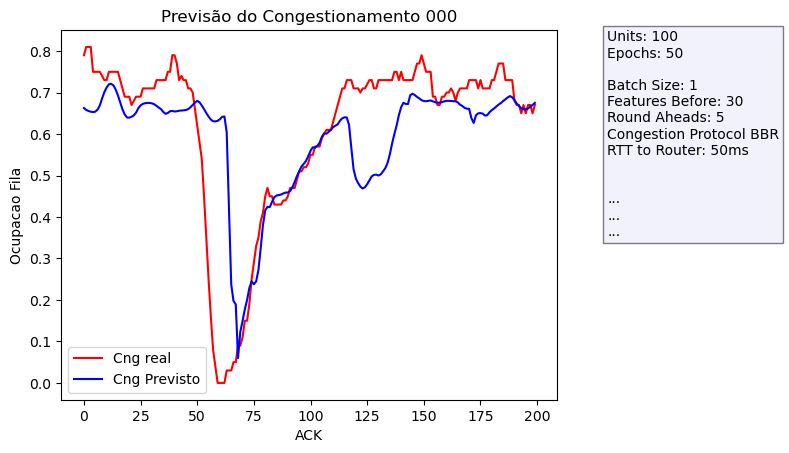

##################Round  1  ##################################
7/7 [==============================] - 2s 29ms/step


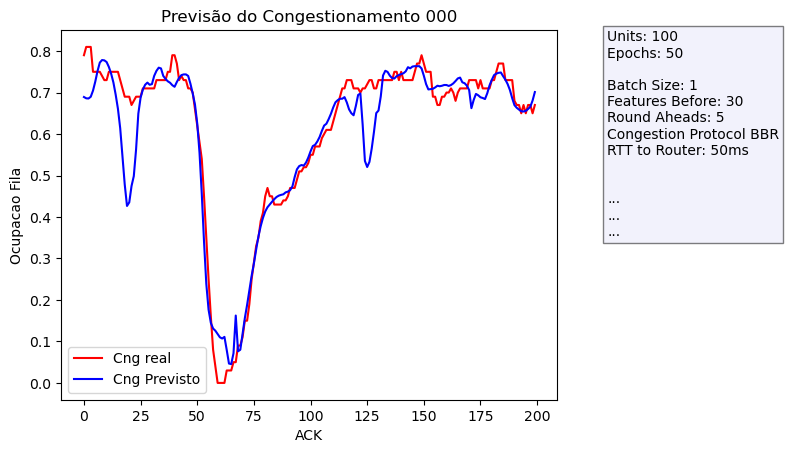

In [10]:
'''
description = "Terminais: 03, dois longos (4GB) e um Very Small (10KB)."+"\n"  
description =description + "Topologia: Dumbell\n"
description =description + "Tempo de Simulação:5min.\n"

GeneralTraining(parExpDir="./Exp_000008/",
                parTrainingPath="./Exp_000008/training_client01.csv",
                parTestPath="./Exp_000008/test_client01.csv",
                parExpDescription=description)
                
'''

# Terminais: 09, 05 longos (4GB), dois "Very Short" (10KB) e dois "Short" (100KB).  
# # Topologia: Dumbell (1000MB,3MB de bottleneck), RTT1=50ms, Salto RTT= 50ms.
# Tempo de Simulação: 15min. 

##################Round  0  ##################################
7/7 [==============================] - 2s 30ms/step


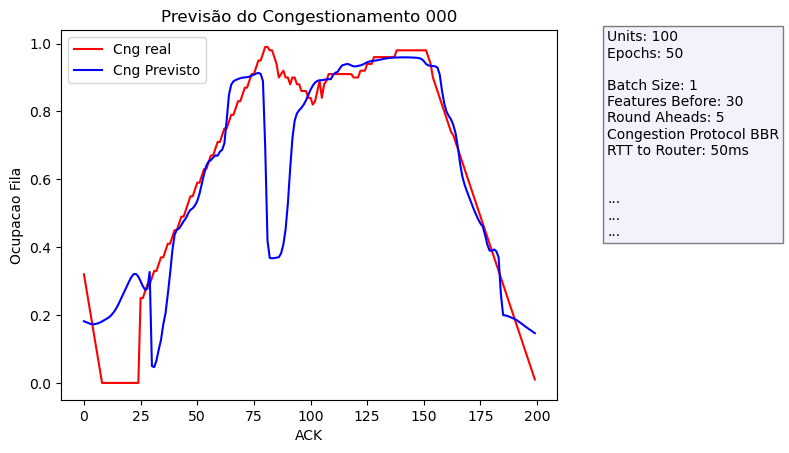

##################Round  1  ##################################
7/7 [==============================] - 2s 31ms/step


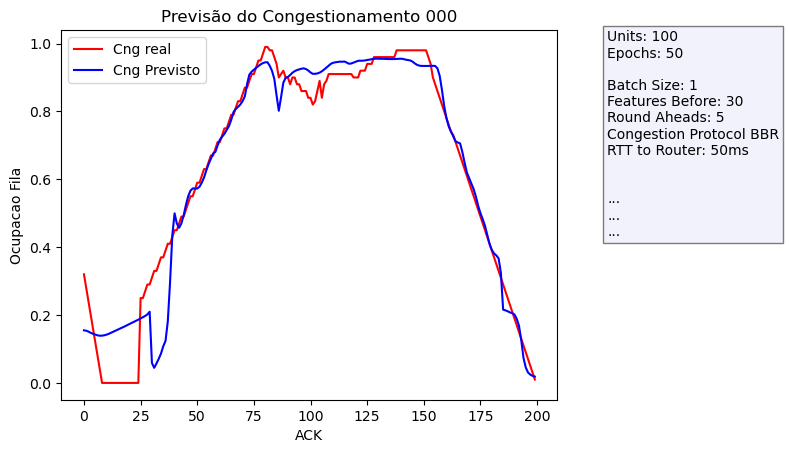

In [11]:
'''
description = "Terminais: 09, 05 longos (4GB), dois Very Short (10KB) e dois Short (100KB)."+"\n"  
description =description + "Topologia: Dumbell (1000MB,3MB de bottleneck), RTT1=50ms, Salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:15min.\n"

GeneralTraining(parExpDir="./Exp_000009/",
                parTrainingPath="./Exp_000009/training_client01.csv",
                parTestPath="./Exp_000009/test_client01.csv",
                parExpDescription=description)
'''
                

# Terminais: 20, 10 longos (4GB), 05 "Very Short" (10KB) e 05 "Short" (100KB).  
# # Topologia: Dumbell (1000MB,1MB de bottleneck), RTT1=50ms, Salto RTT= 50ms. 
# Tempo de Simulação: 30min.

Durante a geração de dados, observousee que a partir de um determinado período o buffer do roteador estabilizava. A explicação é que o BBR ajustava os fluxos de forma a evtar o congestionamento. O que foi feito então foi colocar os não-longos para o terço final da simulação (t_start = 5.0+2*expSimulationTime/3+i+ (float)((rand()%10)/10)) isso foi suficiente para manter o buffer do roteador vriando até o final do experimento.

##################Round  0  ##################################
Chegei ao fim da época
7/7 [==============================] - 2s 28ms/step


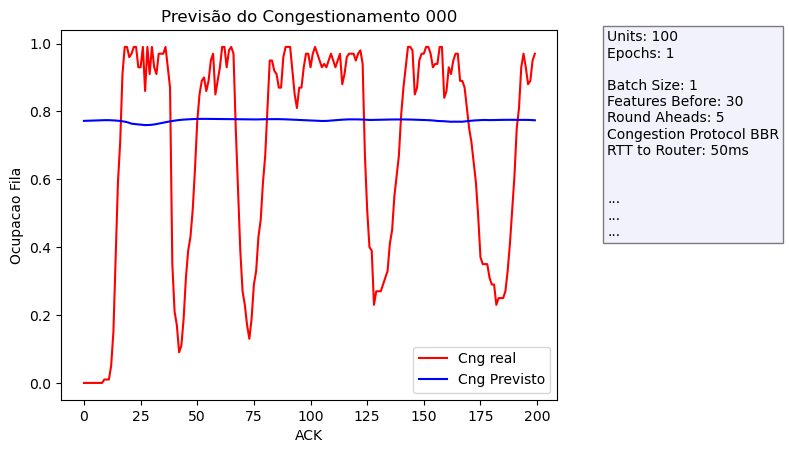

##################Round  1  ##################################


In [ ]:
description = "Terminais: 20, 10 longos (4GB), 05 Very Short (10KB) e 05 Short (100KB)."+"\n"  
description =description + "Topologia: Dumbell (1000MB,1MB de bottleneck), RTT1=50ms, Salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:30min.\n"
description = description+ "Durante a geração de dados, observou-se que a partir de um determinado período \n"
description = description+ "o buffer do roteador estabilizava. A explicação é que o BBR ajustava os fluxos de\n"
description = description+ "forma a evtar o congestionamento. O que foi feito então foi colocar os não-longos\n"
description = description+ "para o terço final da simulação (t_start = 5.0+2*expSimulationTime/3+i+ (float)((rand()%10)/10))\n"
description = description+ "isso foi suficiente para manter o buffer do roteador vriando até o final do experimento.\n"

GeneralTraining(parExpDir="./Exp_0000010/",
                parTrainingPath="./Exp_0000010/training_client01.csv",
                parTestPath="./Exp_0000010/test_client01.csv",
                parExpDescription=description)

Toma um modelo no arquivo e aplica em outro conjunto de dados, em test_client01.csv

In [5]:
import shutil
exp_time=time.ctime();

exp_time = exp_time.replace(":", "_" )
parent_exp_dir = "/content/drive/MyDrive/Colab Notebooks/Exp_000006/Tue May  9 21_01_54 2023/" #de onde vem o modelo treinado
#exp_dir = "/content/drive/MyDrive/Colab Notebooks/Exp_000006/Tue May  9 21_01_54 2023/"
exp_dir=os.path.join(parent_exp_dir, exp_time)
os.mkdir(exp_dir)
shutil.copy2(parent_exp_dir+"model_0.json",exp_dir+"/model_0.json")
shutil.copy2(parent_exp_dir+"model_weights_0.h5",exp_dir+"/model_weights_0.h5")

time.sleep(30)
exp_epoch = 50
exp_units = 100
exp_batch_size=1
exp_T=30
exp_steps_out =5
exp_congestion_protocol = "BBR"
exp_web_nodes= 2

client01_id=0
client01_training_path= "/content/drive/MyDrive/Colab Notebooks/Exp_000006/training_client01.csv"
client01_test_path = "/content/drive/MyDrive/Colab Notebooks/Exp_000006/test_client01.csv"
client01_epoch = exp_epoch
client01_units = exp_units;
client01_batch_size=exp_batch_size
client01_T=exp_T
client01_steps_out = exp_steps_out
client01_congestion_protocol = exp_congestion_protocol
client01_web_nodes= exp_web_nodes
client01_RTT_router = "140.99769e-01ms"


#Registando dados relativos ao cliente 0, comum a todos os clientes, no readme_cliente_000.txt

#file_path = exp_dir+"/readme{:0>3}"+".txt"

#f = open(file_path.format(client01_id), "w")

#f.write(str(client01_RTT_router))
#f.close()

objClient1 = Client(client01_id,
                    client01_training_path,
                    client01_test_path, 
                    client01_epoch,
                    client01_units,
                    client01_batch_size,
                    client01_T,
                    client01_steps_out,
                    client01_congestion_protocol,
                    client01_web_nodes,
                    client01_RTT_router,
                    exp_time,
                    exp_dir)
  ###################Pelo Arquivo#################################
#objClient1.RefreshModelFromFile(0) #não precisa, pois não haverá mais treinamento
objClient1.GetPrevision(0,True)
objClient1.PlotResults()
  #objClient2.GetPrevision()
  #objClient2.PlotResults()

From File
FromFile
7/7 [==============================] - 5s 6ms/step


<IPython.core.display.Javascript object>

In [ ]:
def PlotarGrafico_cwnd(parTrainingData, parColor):
  base = pd.read_csv(parTrainingData)
  base = base.dropna()
  base_treinamento = base.iloc[:, [7]].values
  base_treinamento = np.array(base_treinamento)
  fig, graph = plt.subplots()

  graph.plot(base_treinamento, color = parColor, label = 'Cng real')
  textbox = '\n'.join([
    'Evaluation flow name: ',
    'Evaluation description: ',
    '',
    'Evaluation flow SVN Revision: ',
    'Dataset path: ',
    'Dataset name: ',
    '',
    'Filter: ',
    'Grouping: ',
    'Files selected with filter and grouping: ',
    'Files with all needed signals: ',
    '',
    '...',
    '...',
    '...',
  ])

  bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
  fig.text(1.1,1,textbox,fontsize=10,transform=graph.transAxes, bbox=bbox, verticalalignment='top')
  fig.show()





PlotarGrafico_cwnd("/content/drive/MyDrive/Colab Notebooks/Exp_000006/training_client01.csv","red")
PlotarGrafico_cwnd("/content/drive/MyDrive/Colab Notebooks/Exp_000006/training_client02.csv","blue")

  #base_treinamento = base.iloc[:, [2,4,6]].values


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
###################Testando#################################

#objClient1.LoadTestData()
objClient1.GetPrevision()

#objClient2.LoadTestData()
objClient2.GetPrevision()

'''
#objClient3.LoadTestData()
objClient3.GetPrevision()
'''


In [ ]:
#########################Registrando no Servidor Central#######################################

objServe.RegisterClient(objClient1)
objServe.RegisterClient(objClient2)
#objServe.RegisterClient(objClient3)

#########################Consolidando os modelos#######################################

objServe.ConsolidateModels()
objServe.FeedBackConsolidatedModel()

#########################Testando o novo modelo#######################################
#########################Atualizando, conforme o caso#######################################

objClient1.RefreshModel()
objClient2.RefreshModel()
#objClient3.RefreshModel()
#print (objClient3.currentConfusionMatriz)

#########################Novas aproximações, após atualização ou não dos modelos#######################################

objClient1.GetPrevision()
objClient2.GetPrevision()

#objClient3.GetPrevision()
#print (objClient3.currentConfusionMatriz)



In [ ]:
listaBase = [["amarelo","verde","preto"], ["azul","abóbora","marrom"], ["uva","laranja","branco"]]
arrays_in_Layer=[]
lstTemp = []
lst_arrays_in_Layer = []
for layer in listaBase:
  for arr in layer:
    lstTemp.append(arr)
  arrays_in_Layer = [i for i in lstTemp]
  lst_arrays_in_Layer.append(arrays_in_Layer)
  lstTemp.clear()
print (lst_arrays_in_Layer)

[['amarelo', 'verde', 'preto'], ['azul', 'abóbora', 'marrom'], ['uva', 'laranja', 'branco']]


In [ ]:
base_iris = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iris.csv")
previsores_iris = base_iris.iloc[:,0:4].values 
classes_iris = base_iris.iloc[:,4].values
labelencoder = LabelEncoder()
classes_iris = labelencoder.fit_transform(classes_iris)
classes_dummy_iris = np_utils.to_categorical(classes_iris)
# iris setosa     1 0 0
# iris virginica  0 1 0
# iris versicolor 0 0 1
previsores_treinamento_iris, previsores_teste_iris, classe_treinamento_iris,classe_teste_iris = train_test_split(previsores_iris,classes_dummy_iris, test_size=0.25)
classificador = Sequential()
classificador.add(Dense(units = 4, activation = 'relu', input_dim = 4))
classificador.add(Dense(units = 4, activation = 'relu'))
classificador.add(Dense(units = 3, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                      metrics = ['categorical_accuracy'])
classificador.fit(previsores_treinamento_iris, classe_treinamento_iris, batch_size = 10,
                  epochs = 1000)

resultado_iris = classificador.evaluate(previsores_teste_iris, classe_teste_iris)
previsoes_iris = classificador.predict(previsores_teste_iris)
previsoes_iris = previsoes_iris > 0.5
#classe_teste2 e previsoes2 são listas
classe_teste2 = [np.argmax(t) for t in classe_teste_iris]
previsoes2 = [np.argmax(t) for t in previsoes_iris]
matriz_iris = confusion_matrix(previsoes2, classe_teste2)
print(matriz_iris)



In [ ]:
def LoadTrainingDataSet():
      #base = pd.read_csv(self.trainingPath)
      #base = base.dropna()
      #base_treinamento = base.iloc[:, [2,4,6,8,9]].values
      base_treinamento = np.array([
                          [0.0618679825944638,1.48529333300134E-05,0.849658635009267,	1,	0.8],
                          [0.0618642722717276,1.29963255564132E-05,0.856697088426436,0.960369635326222,0.8],
                          [0.061861180336114,	1.13717804155358E-05,0.863735541843606,0.915095509799057,	0.78],
                          [0.0618582945295414,9.95030786359384E-06,0.870773995260775,0.892458447035475,	0.76],
                          [0.0620104177617272,8.70651048799314E-06,0.877953217746287,0.869821384271893,	0.74],
                          [0.06214357712215,  7.6182100159712E-06, 0.8851324402318,0.860208385016125,	0.72],
                          [0.0622600400302597	,6.66593154081194E-06	,0.892311662717312,0.847184321508311,	0.7],
                          [0.0623620739055063	,5.83269009821044E-06	,0.899490885202825,	0.847184321508311,	0.68],
                          [0.0624511216511761	,5.1035993896084E-06,0.906670107688337,0.847184321508311,	0.69],
                          [0.062529244557678	,4.46565835855882E-06	,0.91384933017385	,0.847184321508311,	0.78],
                          [0.0625974732702166,3.9074488405761E-06	,0.921028552659362	,0.847184321508311,	0.58],
                          [0.0626572506920783	,3.41901106601549E-06	,0.928207775144875,0.847184321508311,	0.48],
                          [0.0627096074684674	,2.99163023643782E-06	,0.935386997630387,0.847184321508311,	0.38],
                          [0.0627553681155477	,2.61767645688309E-06	,0.9425662201159,0.0226370627635822,	0.18],
                          [0.0627953571494827	,2.29048023874991E-06	,0.949745442601412,0.0226370627635822,	0.28],


      ])
      #normalizador = MinMaxScaler(feature_range=(0,1))
      #base_treinamento = normalizador.fit_transform(base_treinamento)
      previsores=[]
      real_congestion = []

      real_congestion_ahead = []

      T=3

      n_steps_out = 4

      for i in range(T, base_treinamento.shape[0]):
        end_ix = i+n_steps_out
        if end_ix > base_treinamento.shape[0]:
          break;
        #previsores.append(base_treinamento[i-self.T:i, 0:4])#o que é considerado é o limite superior do rante -1
        previsores.append(base_treinamento[i-T:i, 0:4])#o que é considerado é o limite superior do rante -1 e sem a informação do percentual de ocupação do buffer
        real_congestion.append(base_treinamento[(i-1)+n_steps_out,4])#
        '''
        #Se quiser repetir os últimos valores
        real_congestion_ahead.clear();
        
        for k in range (self.n_steps_out):
          if i+k < base_treinamento.shape[0]:
            #print(i+k,"---> ", base_treinamento[i+k, 3])
            real_congestion_ahead.append(base_treinamento[i+k, 4])#O resultado é do último cara
          else:
            real_congestion_ahead.append(base_treinamento[base_treinamento.shape[0]-1, 4])#O resultado é do último cara
        real_congestion.append(real_congestion_ahead.copy())
        '''
        #print(real_congestion)
        #input("real_congestion ++")
      previsores, real_congestion = np.array(previsores), np.array(real_congestion)
      return previsores, real_congestion



      '''

      #base_treinamento.shape[0] número de linhas dos dados de treinamento
      #"-self.n_steps_out", pois, se não estoura, não dá para fazer 5 a frente a partir do último                                                                   
      for i in range(T, base_treinamento.shape[0]):
        end_ix = i+n_steps_out
        if end_ix > base_treinamento.shape[0]:
          break;
        #previsores.append(base_treinamento[i-self.T:i, 0:4])#o que é considerado é o limite superior do rante -1
        previsores.append(base_treinamento[i-T:i, 0:4])#o que é considerado é o limite superior do rante -1 e sem a informação do percentual de ocupação do buffer
        real_congestion.append(base_treinamento[(i-1)+n_steps_out,4])
        
        #Se quiser repetir os últimos valores
        real_congestion_ahead.clear();
        
        for k in range (self.n_steps_out):
          if i+k < base_treinamento.shape[0]:
            #print(i+k,"---> ", base_treinamento[i+k, 3])
            real_congestion_ahead.append(base_treinamento[i+k, 4])#O resultado é do último cara
          else:
            real_congestion_ahead.append(base_treinamento[base_treinamento.shape[0]-1, 4])#O resultado é do último cara
        real_congestion.append(real_congestion_ahead.copy())
        
        #print(real_congestion)
        #input("real_congestion ++")
      previsores, real_congestion = np.array(previsores), np.array(real_congestion)
      
      print("shape previsores: ")
      print(previsores.shape)
      #input("shape dos previsores")
      #print(previsores)
      #input("exibidos os previsores")
      print("Real Congestion: ")
      print(real_congestion)
      #input("exibidos os Congestionamentos Reais")
      input_shape = previsores.shape[1]
      return previsores, real_congestion
      '''

p,r = LoadTrainingDataSet()
for i in range(p.shape[0]):
  print(p[i], r[i])


[[6.18679826e-02 1.48529333e-05 8.49658635e-01 1.00000000e+00]
 [6.18642723e-02 1.29963256e-05 8.56697088e-01 9.60369635e-01]
 [6.18611803e-02 1.13717804e-05 8.63735542e-01 9.15095510e-01]] 0.7
[[6.18642723e-02 1.29963256e-05 8.56697088e-01 9.60369635e-01]
 [6.18611803e-02 1.13717804e-05 8.63735542e-01 9.15095510e-01]
 [6.18582945e-02 9.95030786e-06 8.70773995e-01 8.92458447e-01]] 0.68
[[6.18611803e-02 1.13717804e-05 8.63735542e-01 9.15095510e-01]
 [6.18582945e-02 9.95030786e-06 8.70773995e-01 8.92458447e-01]
 [6.20104178e-02 8.70651049e-06 8.77953218e-01 8.69821384e-01]] 0.69
[[6.18582945e-02 9.95030786e-06 8.70773995e-01 8.92458447e-01]
 [6.20104178e-02 8.70651049e-06 8.77953218e-01 8.69821384e-01]
 [6.21435771e-02 7.61821002e-06 8.85132440e-01 8.60208385e-01]] 0.78
[[6.20104178e-02 8.70651049e-06 8.77953218e-01 8.69821384e-01]
 [6.21435771e-02 7.61821002e-06 8.85132440e-01 8.60208385e-01]
 [6.22600400e-02 6.66593154e-06 8.92311663e-01 8.47184322e-01]] 0.58
[[6.21435771e-02 7.6182100

In [ ]:
def LoadTestData():
      
      base = [[0.0618679825944638,1.48529333300134E-05,0.849658635009267,	1,	0.8],
                          [0.0618642722717276,1.29963255564132E-05,0.856697088426436,0.960369635326222,0.8],
                          [0.061861180336114,	1.13717804155358E-05,0.863735541843606,0.915095509799057,	0.78],
                          [0.0618582945295414,9.95030786359384E-06,0.870773995260775,0.892458447035475,	0.76],
                          [0.0620104177617272,8.70651048799314E-06,0.877953217746287,0.869821384271893,	0.74],
                          [0.06214357712215,  7.6182100159712E-06, 0.8851324402318,0.860208385016125,	0.72],
                          [0.0622600400302597	,6.66593154081194E-06	,0.892311662717312,0.847184321508311,	0.7],
                          [0.0623620739055063	,5.83269009821044E-06	,0.899490885202825,	0.847184321508311,	0.68],
                          [0.0624511216511761	,5.1035993896084E-06,0.906670107688337,0.847184321508311,	0.69],
                          [0.062529244557678	,4.46565835855882E-06	,0.91384933017385	,0.847184321508311,	0.18],
      ]
   
      base_teste =        [[0.0618679825944638,1.48529333300134E-05,0.849658635009267,	1,	0.8],
                          [0.0618642722717276,1.29963255564132E-05,0.856697088426436,0.960369635326222,0.40],
                          [0.061861180336114,	1.13717804155358E-05,0.863735541843606,0.915095509799057,	0.78],
                          [0.0618582945295414,9.95030786359384E-06,0.870773995260775,0.892458447035475,	0.76],
                          [0.0620104177617272,8.70651048799314E-06,0.877953217746287,0.869821384271893,	0.74],
                          [0.06214357712215,  7.6182100159712E-06, 0.8851324402318,0.860208385016125,	0.72],
                          [0.0622600400302597	,6.66593154081194E-06	,0.892311662717312,0.847184321508311,	0.7],
                          [0.0623620739055063	,5.83269009821044E-06	,0.899490885202825,	0.847184321508311,	0.68],
                          [0.0624511216511761	,5.1035993896084E-06,0.906670107688337,0.847184321508311,	0.69],
                          [0.062529244557678	,4.46565835855882E-06	,0.91384933017385	,0.847184321508311,	0.78],
                          [0.0625974732702166,3.9074488405761E-06	,0.921028552659362	,0.847184321508311,	0.58],
                          [0.0626572506920783	,3.41901106601549E-06	,0.928207775144875,0.847184321508311,	0.48],
                          [0.0627096074684674	,2.99163023643782E-06	,0.935386997630387,0.847184321508311,	0.38],
                          [0.0627553681155477	,2.61767645688309E-06	,0.9425662201159,0.0226370627635822,	0.18],
                          [0.0627953571494827	,2.29048023874991E-06	,0.949745442601412,0.0226370627635822,	0.28]
            ]

      #self.real_congestion_test = base_teste.iloc[:, 5:6].values
      base = pd.DataFrame(base)
      base_teste = pd.DataFrame(base_teste)
      real_congestion_test = base_teste.iloc[:, 4:5]      
      #print("antes de deslocar")
      #print(self.real_congestion_test)

      T=3

      n_steps_out = 4      
     
      frames = [base, base_teste]
      base_completa = pd.concat(frames)
      '''
      base_completa = base_completa.drop('#Ack', axis =1) #
      base_completa = base_completa.drop('ack_ewma(ms)', axis =1)
      base_completa = base_completa.drop('send_ewma(ms)', axis =1)
      base_completa = base_completa.drop('rtt_tatio', axis =1)
      base_completa = base_completa.drop('cwnd (Bytes)', axis =1)
      base_completa = base_completa.drop('Last Router Ocupation Ack Arriaval(Packets)', axis =1)#O que se quer prever
      base_completa = base_completa.drop('Last Router Ocupation Packet Sent(Packets)', axis =1)
      base_completa = base_completa.drop('Network Situation', axis =1)
      base_completa = base_completa.drop('AckArrival(ms)', axis =1)
      base_completa = base_completa.drop('TSInsideAck(ms)', axis =1)
      base_completa = base_completa.drop('RTTAck(ms)', axis =1)
      '''
      entradas = base_completa[len(base_completa) - len(base_teste) - (T+n_steps_out-1):].values
      #base_teste_features = base_teste.iloc[:, [1,2,3,6]].values
      print("#############len(base_teste): ",len(base_teste))
      len_base_teste = len(base_teste)
      X_teste = []
      Y_teste=[]

      for i in range(T+n_steps_out-1, len(base_teste)+T+n_steps_out-1): # para as duzentas previsoes, o mesmo tramanho do Teste.csv, ou seja 290-90
        #X_teste.append(entradas[i-self.T:i,0:4])
        #end_ix = i+self.n_steps_out
        if i >= entradas.shape[0]:
          break;
        X_teste.append(entradas[i-(T+n_steps_out-1):i-(n_steps_out-1),0:4])
        Y_teste.append(entradas[i,4])


      '''
      #só lembrar que quando n_steps_out=1 não se deve fazer nada!
      entradas = base_completa[len(base_completa) - len(base_teste) - (T+n_steps_out-1):].values
      #base_teste_features = base_teste.iloc[:, [1,2,3,6]].values
      print("#############len(base_teste): ",len(base_teste))
      len_base_teste = len(base_teste)
      X_teste = []
      Y_teste = []

      for i in range(T+n_steps_out-1, len(base_teste)+T+n_steps_out-1): # para as duzentas previsoes, o mesmo tramanho do Teste.csv, ou seja 290-90
        #X_teste.append(entradas[i-self.T:i,0:4])
        #end_ix = i+n_steps_out
        if i >= entradas.shape[0]:
          break;
        X_teste.append(entradas[i-(T+n_steps_out-1):i-(n_steps_out-1),0:4])
        Y_teste.append(entradas[i,4])

        #previsores.append(base_treinamento[i-self.T:i, 0:4])#o que é considerado é o limite superior do rante -1
        #real_congestion.append(base_treinamento[(i-1)+self.n_steps_out,4])#
        #print("Previsor")
        #print(X_teste[i-self.T])
        #input("Exibido mais um previsor")

      '''
      test_vectors, real_congestion_test = np.array(X_teste), np.array(Y_teste) # equivalente ao X_teste
      return test_vectors, real_congestion_test


p,r = LoadTestData()
for i in range(p.shape[0]):
  print(p[i], r[i])


#############len(base_teste):  15
[[6.20104178e-02 8.70651049e-06 8.77953218e-01 8.69821384e-01]
 [6.21435771e-02 7.61821002e-06 8.85132440e-01 8.60208385e-01]
 [6.22600400e-02 6.66593154e-06 8.92311663e-01 8.47184322e-01]] 0.8
[[6.21435771e-02 7.61821002e-06 8.85132440e-01 8.60208385e-01]
 [6.22600400e-02 6.66593154e-06 8.92311663e-01 8.47184322e-01]
 [6.23620739e-02 5.83269010e-06 8.99490885e-01 8.47184322e-01]] 0.4
[[6.22600400e-02 6.66593154e-06 8.92311663e-01 8.47184322e-01]
 [6.23620739e-02 5.83269010e-06 8.99490885e-01 8.47184322e-01]
 [6.24511217e-02 5.10359939e-06 9.06670108e-01 8.47184322e-01]] 0.78
[[6.23620739e-02 5.83269010e-06 8.99490885e-01 8.47184322e-01]
 [6.24511217e-02 5.10359939e-06 9.06670108e-01 8.47184322e-01]
 [6.25292446e-02 4.46565836e-06 9.13849330e-01 8.47184322e-01]] 0.76
[[6.24511217e-02 5.10359939e-06 9.06670108e-01 8.47184322e-01]
 [6.25292446e-02 4.46565836e-06 9.13849330e-01 8.47184322e-01]
 [6.18679826e-02 1.48529333e-05 8.49658635e-01 1.00000000e+00]